In [1]:
# Import non plotting packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import numpy.typing as npt
import powerlaw
import scipy 
# Import plotting packages and set style
import matplotlib
import scienceplots
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator

plt.style.use('science')
matplotlib.rcParams.update({'font.size': 20})

Loading in search results across all tiles


In [2]:
low_f_results = np.loadtxt('../Shared_data_files/Search_results/low_f/final_best_positions.txt')
high_f_results = np.loadtxt('../Shared_data_files/Search_results/high_f/final_best_positions.txt')
search_results = []
search_results.extend(list(high_f_results[high_f_results[:,-1]>90]))
search_results.extend(list(low_f_results[low_f_results[:,-1]>90]))
search_results = np.array(search_results)


/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_1801/1065107255.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap("tab10")


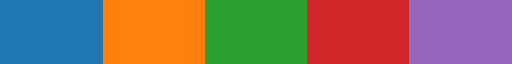

In [3]:


# Choose a discrete colormap (here "tab10")
base_cmap = plt.cm.get_cmap("tab10")

# Extract the first 5 colors
colors = base_cmap.colors[:5]

# Create a ListedColormap
cmap = ListedColormap(colors)

cmap

In [4]:
def fit_power_law_model_and_evaluate_probabilities_estimate_peak(false_alarm_samples: npt.NDArray,
                                                   search_statistics: npt.NDArray)->npt.NDArray:

    '''Power law model is p(x) \propto x^(-alpha) for x>xmin '''


    fit  = powerlaw.Fit(false_alarm_samples)
    print('Power law exponent: ', fit.power_law.alpha, 'Power law xmin: ',fit.power_law.xmin)


    # fraction of samples above peak. Power law distribution normally integrates to 1 between peak and infinity, so just add a prefactor to integrate to f the fraction of samples above peak.
    f = np.sum(false_alarm_samples>fit.power_law.xmin)/len(false_alarm_samples)

    A = ((-np.abs(fit.power_law.alpha)+1)*f)/(-fit.power_law.xmin**(-np.abs(fit.power_law.alpha)+1))
    power_law_limits = A/(-np.abs(fit.power_law.alpha)+1) * -(search_statistics)**(-np.abs(fit.power_law.alpha)+1)
    return(power_law_limits)


def fit_gumbel_model_and_evaluate_probabilities(false_alarm_samples: npt.NDArray,
                                                   search_statistics: npt.NDArray)->npt.NDArray:
    

      
    gumbel_params = scipy.stats.gumbel_r.fit(false_alarm_samples)

    gumbel_limits = scipy.stats.gumbel_r.sf(search_statistics,loc=gumbel_params[0],scale=gumbel_params[1])

    return(gumbel_limits)


/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_1801/2148025773.py:31: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  broken_tiles = np.loadtxt('../Shared_data_files/Search_results/broken_tiles.txt',dtype=int)
/Users/diganta/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: divide by zero encountered in matmul
  shade = ((normals / np.linalg.norm(normals, axis=1, keepdims=True))
/Users/diganta/Library/Python/3.9/lib/python/site-packages/mpl_toolkits/mplot3d/art3d.py:1239: RuntimeWarning: overflow encountered in matmul
  shade =

len before removing broken tiles:  (1201, 9) (1602, 9)
Number of tiles plotted:  2680
Source 1
4
Source 5
1
Source 8
3
Source 9
2
Source 10
0
GAPPED FAPS: 

Source 1
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
Calculating best minimal value for power law fit
Power law exponent:  12.414946086666006 Power law xmin:  47.56103294128933
8.735364086382235e-06
9.028166513652906e-08


Source 5
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
Calculating best minimal value for power law fit
Power law exponent:  16.762182724630332 Power law xmin:  60.10262211717701
4.915242943150036e-07
1.161875362107203e-07


Source 8
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:  53.71346834001108
Calculating best minimal value for power law fit
Power law exponent:  11.299116803529921 Power law xmin:

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_1801/2148025773.py:346: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


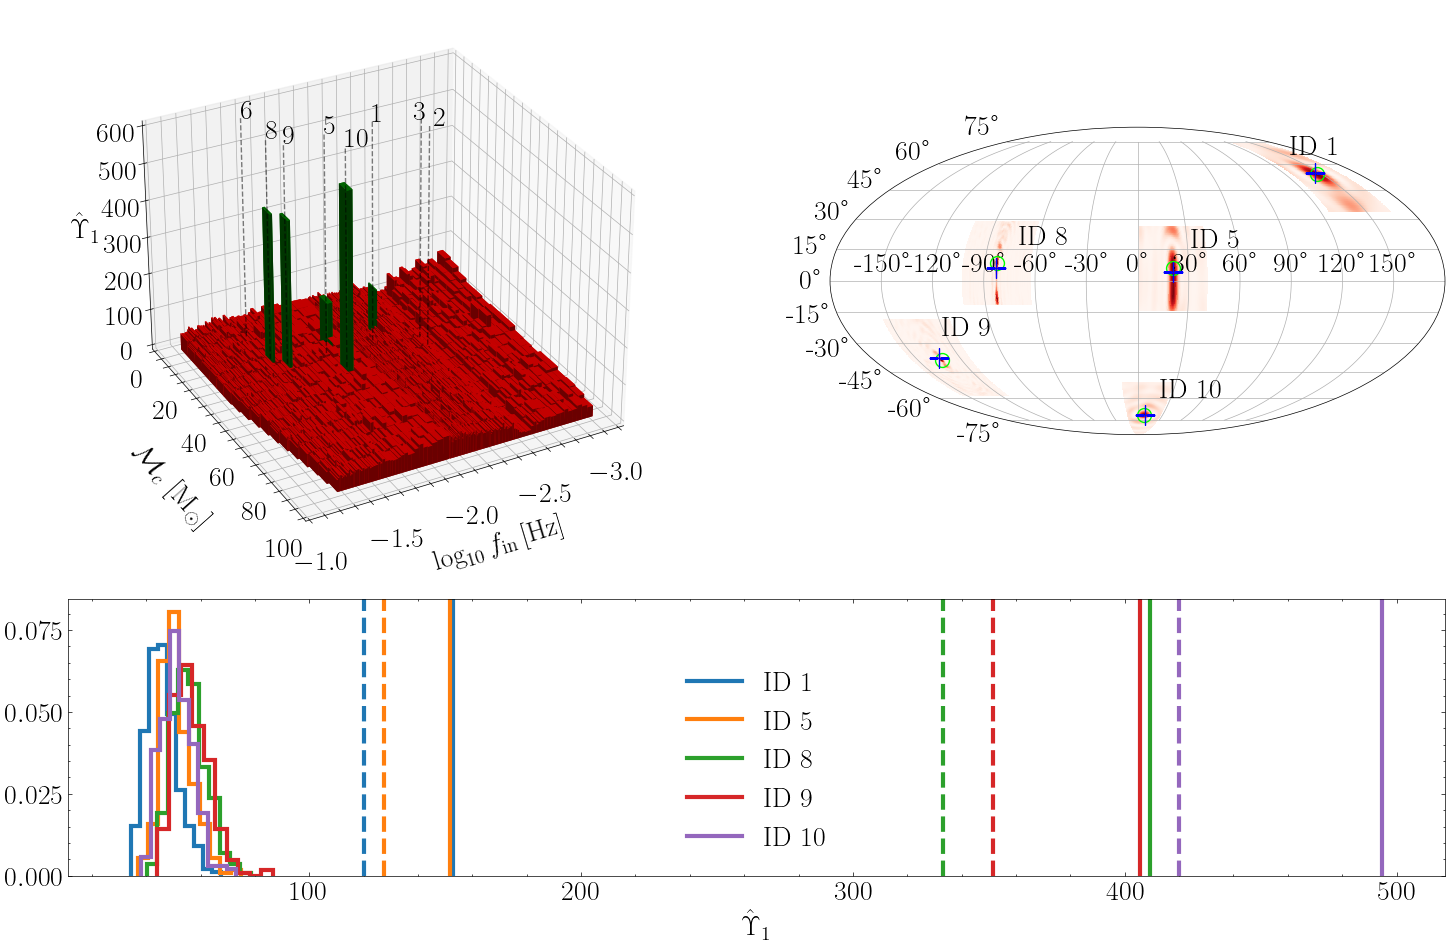

In [5]:
from matplotlib.ticker import MultipleLocator


fig = plt.figure(figsize=(15,10),constrained_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=2,height_ratios=[2,1])
ax0 = fig.add_subplot(gs[0, 0],projection='3d')



# ######## top right plot: tf 


low_f_results = np.loadtxt('../Shared_data_files/Search_results/low_f/final_best_positions.txt')
low_f_priors = np.load('../Shared_data_files/Search_results/low_f/priors.npy')
f_low_priors = np.log10(low_f_priors[:,0,:])
mc_priors = low_f_priors[:,1,:]
upsilon_maxes = low_f_results[:,-1]
f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()

master_upsilon_maxes = list(upsilon_maxes)
master_f_low_anchors = list(f_low_anchors)
master_mc_anchors = list(mc_anchors)
master_f_low_widths = list(f_low_widths)
master_mc_widths = list(mc_widths)

# These are the tiles in which even with 3 hour TF segment the whole evolution of the signal cannot be split up into N_high segments. I.e the beginning of the search does not work
broken_tiles = np.loadtxt('../Shared_data_files/Search_results/broken_tiles.txt',dtype=int)
# 1201 Is the index if the high segment tile past which there are *only* broken tiles. I.e past this point in Mc,f_0 space there are no tiles where N=50 is computable correctly. 
broken_tiles = broken_tiles[broken_tiles<1201]

high_f_results = np.loadtxt('../Shared_data_files/Search_results/high_f/final_best_positions.txt')
high_f_priors = np.load('../Shared_data_files/Search_results/high_f/priors.npy')
print('len before removing broken tiles: ', high_f_results.shape, low_f_results.shape)
high_f_results = np.delete(high_f_results,broken_tiles,axis=0)
high_f_priors = np.delete(high_f_priors,broken_tiles,axis=0)

f_low_priors = np.log10(high_f_priors[:,0,:])
mc_priors = high_f_priors[:,1,:]

upsilon_maxes = high_f_results[:,-1]

f_low_anchors = f_low_priors[:,0]
mc_anchors = mc_priors[:,0]

f_low_widths = np.diff(f_low_priors,axis=1).flatten()
mc_widths = np.diff(mc_priors,axis=1).flatten()

master_upsilon_maxes.extend(list(upsilon_maxes))
master_f_low_anchors.extend(list(f_low_anchors))
master_mc_anchors.extend(list(mc_anchors))
master_f_low_widths.extend(list(f_low_widths))
master_mc_widths.extend(list(mc_widths))


colors = ['g' if i is i>=90 else 'r' for i in master_upsilon_maxes]

f_low_sources = [5.85830665*1.e-3,
                 3.00851783*1.e-3,
                 3.00698596*1.e-3,
                 12.24273032*1.e-3,
                 28.02352272 *1.e-3,
                 27.65438527*1.e-3,
                 23.76783772*1.e-3,
                 11.31112717*1.e-3]
mc_sources  =[29.34741587,
              38.04622881,
              34.51216704,
              27.41970433,
              7.007404972,
              22.40969304,
              26.08583360,
              39.14942200]
labels = ['1',
          '2', 
          '3',
          '5',
          '6',
          '8',
          '9',
          '10']

print('Number of tiles plotted: ', len(master_upsilon_maxes))


ax0.view_init(elev=30
             , azim=62)
bottom_anchor_points = np.zeros_like(master_upsilon_maxes)

ax0.bar3d(np.array(master_f_low_anchors),
         np.array(master_mc_anchors), 
         np.array(bottom_anchor_points), 
         np.array(master_f_low_widths),
         np.array(master_mc_widths), 
         np.array(master_upsilon_maxes), shade=True,color=colors,zorder=1)

ax0.set_xlabel(r'$\mathrm{log}_{\mathrm{10}}\, f_{\mathrm{in}} \, [\rm Hz]$',labelpad = 15)
ax0.set_ylabel(r'$\mathcal{M}_c \,\,  [\mathrm{M}_{\odot}]$',labelpad = 15)
ax0.zaxis.set_rotate_label(False)  # disable automatic rotation
ax0.set_zlabel(r'$\hat{\Upsilon}_{1}$',labelpad=7,rotation=0)
# ax0.zaxis.label.set_rotation(0)
# ax0.zaxis.label.set_rotation(180) 





pos = ax0.get_position()
ax0.set_position([pos.x0 + 0.05, pos.y0 + 0.05,
                 pos.width * 0.9, pos.height * 0.9])
ax0.tick_params(axis='x', which='major', pad=7)


for i in range(len(f_low_sources)):

    # Following stuff just makes it easier to plot the sources in the middle of the tiles
    
    d_Mc = 5 
    Mcs = np.arange(5,100,d_Mc)

    # High frequency 
    if f_low_sources[i] >= 0.01:
        d_flow = 0.001
        f_lows = np.arange(0.01,0.1,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

        
    #Low frequency 
    else:
        d_flow = 0.0001
        f_lows = np.arange(0.001,0.01,d_flow)

        f_index = np.searchsorted(f_lows,f_low_sources[i])

        f_low_plot = (f_lows[f_index-1]+f_lows[f_index])/2

        Mc_index = np.searchsorted(Mcs,mc_sources[i])

        Mc_plot = (Mcs[Mc_index-1]+Mcs[Mc_index])/2

    ax0.plot([np.log10(f_low_plot),np.log10(f_low_plot)],
             [Mc_plot,Mc_plot],
             [0,600],lw=1,color='k',ls='--',zorder=3,alpha=0.5)
    # Bodge to seperate labels 2 and 3 
    if labels[i] == '2':
        ax0.text(np.log10(f_low_plot)*1.01,Mc_plot*1.01,600,labels[i])
    elif labels[i] == '3':
        ax0.text(np.log10(f_low_plot)*0.98,Mc_plot*0.98,600,labels[i])
    else:
        ax0.text(np.log10(f_low_plot),Mc_plot,600,labels[i])


ax0.xaxis.set_major_locator(MaxNLocator(nbins=5))
############################################################################################


#### Skymap figure #####
catalog = pd.read_csv('../Shared_data_files/catalog.csv')
catalog['Name'] = np.array([['Source 1'],
                            ['Source 5'],
                            ['Source 8'],
                            ['Source 9'],
                            ['Source 10']])
ax0_1 = fig.add_subplot(gs[0, 1],projection='mollweide')

ax0_1.grid(True)

for index,sobbh in catalog.iterrows():
    print(sobbh['Name'])

    m1 = sobbh['Mass1']
    m2 = sobbh['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat_injected = sobbh['EclipticLatitude']
    ecliptic_long_injected = sobbh['EclipticLongitude']
    # f_low = sobbh['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    print(index)
    
    max_upsilon = search_results[index,-1]

    # parameters (FROM SEARCH)

    mc_search_result = search_results[index][0]
    q_search_result = search_results[index][1]
    cosinc_search_result = search_results[index][2]
    e0_search_result = search_results[index][3]
    f0_search_result = search_results[index][4]
    lambda_search_result = search_results[index][5]
    beta_search_result = search_results[index][6]
    psi_search_result = search_results[index][7]

    # Load in precomputed skymap datafile
    # Format is X,Y,statistics
    datafile = np.load(str('../Shared_data_files/Skymaps/'+sobbh['Name'])+'_skymap.npy')

    X = datafile[0]
    Y = datafile[1]
    statistics = datafile[2]

    # Make a grid of (lambda,beta) around the found source
    sqrt_N = 120 #NOTE: RESOLUTION OF SKYMAP HAS TO MATCH WHAT WAS USED TO CREATE THE DATAFILE ABOVE


    lambdas_unravelled = X.flatten()
    betas_unravelled = Y.flatten()

    ax0_1.pcolormesh(X-np.pi,Y,statistics,cmap='Reds')
    # plt.colorbar()
    ax0_1.plot(lambda_search_result-np.pi,beta_search_result,'o',markersize=10,color='lime',markerfacecolor='None')
    ax0_1.scatter(ecliptic_long_injected-np.pi,ecliptic_lat_injected,marker='+',s=200,color='b',linewidths=1,zorder=10)


    name_replacement = sobbh['Name'].replace('Source','ID')
    
    ax0_1.text((ecliptic_long_injected-np.pi)+0.2,ecliptic_lat_injected+0.2,name_replacement)

    

pos = ax0_1.get_position()
ax0_1.set_position([
    pos.x0 - 0.05,   # move left
    pos.y0 - 0.05,   # move down
    pos.width * 1.1, # make wider
    pos.height * 1.1 # make taller
])


############################################################################################

###  Bottom figure 
ax1 = fig.add_subplot(gs[1, :])
sobbh_indexes = [1,5,8,9,10]

histogram_samples_storage = []
max_histogram_bin = []
# Gapped power laws 

gapped_power_law_false_alarms = []

# Ungappped power laws

ungapped_power_law_false_alarms = []

# Gapped Gumbel 

gapped_gumbel_false_alarms = []

# Ungapped Gumbel 

ungapped_gumbel_false_alarms = []

# Storage of bins 
histogram_bins_storage =[]

for true_index,index in enumerate(sobbh_indexes):
    filename = '../Shared_data_files/False_alarm_runs/SOBBH'+str(index)+'/results_storage.txt'
    FAP_data = np.loadtxt(filename)
    final_upsilons = FAP_data[:,-1]
    ax1.hist(final_upsilons,histtype='step',bins=10,lw=3,color=cmap(true_index),density=True)#,label='Source '+str(index))

    counts,bins = np.histogram(final_upsilons,bins=10)
    bin_midpoints = (bins[1:] + bins[:-1])/2

    max_bin = bin_midpoints[np.argmax(counts)+1]
    max_histogram_bin.append(max_bin)

    histogram_samples_storage.append(final_upsilons)
    histogram_bins_storage.append(bins)
## Gapped results
print('GAPPED FAPS: \n')
for index,row in catalog.iterrows():
    print(row['Name'])
    final_swarm_data = np.loadtxt('../Shared_data_files/Gapped/' + row['Name'] + '/best_position_and_value.txt')
    best_position= final_swarm_data[:-1]
    best_value = final_swarm_data[-1]
    ax1.axvline(best_value,lw=3,color=cmap(index),ls='--')

    # ax1.scatter(best_value,0.03,lw=3,color=cmap(index),marker="v")
    # print('Gapped false alarm rates: ')
    gapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    gapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[index],np.array(best_value)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[index],np.array(best_value)))
    print('\n')

Upsilon_90_False_alarms_power_law = []
Upsilon_90_False_alarms_Gumbel = []

## Full duty cycle results
print('FULL DUTY CYCLE FAPS: \n')

for true_index,row in catalog.iterrows():
    print(row['Name'])

    m1 = row['Mass1']
    m2 = row['Mass2']

    mc = ((m1*m2)**(3/5))/(m1+m2)**(1/5)
    ecliptic_lat = row['EclipticLatitude']
    ecliptic_long = row['EclipticLongitude']
    f_low = row['InitialFrequency']

    index = np.argmin(np.abs(search_results[:,0] - mc))

    max_upsilon = search_results[index,-1]
    name_replacement = row['Name'].replace('Source','ID')
    ax1.axvline(max_upsilon,lw=3,color=cmap(true_index),label=name_replacement)
    # ax1.scatter(max_upsilon,0.06,lw=3,color=cmap(true_index),label=row['Name'],marker="^")

    # PREDICTED GAPPED SEARCH STATISTIC
    # ax.axvline(max_upsilon*0.85,lw=1,color=cmap(true_index),ls='dotted')

    print('Full duty cycle false alarm rates: ')
    ungapped_power_law_false_alarms.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    ungapped_gumbel_false_alarms.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],np.array(max_upsilon)))
    print(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],np.array(max_upsilon)))

    Upsilon_90_False_alarms_power_law.append(fit_power_law_model_and_evaluate_probabilities_estimate_peak(histogram_samples_storage[true_index],90))
    Upsilon_90_False_alarms_Gumbel.append(fit_gumbel_model_and_evaluate_probabilities(histogram_samples_storage[true_index],90))

    print('\n')

ax1.legend()

# ax.semilogy()

# ax1.set_xlabel(r'$\mathrm{max}_{\xi}(\Upsilon_{N=1})$')
ax1.set_xlabel(r'$\hat{\Upsilon}_{1}$')

# ax1.set_ylabel('Number of events')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('Fig_2.pdf')
plt.show()

In [6]:


df_latex_table = pd.DataFrame({
    "Names": catalog['Name'].to_list(),
    "Power law: Full duty cycle": np.array(ungapped_power_law_false_alarms),
    "Power law: 85% duty cyle": np.array(gapped_power_law_false_alarms),
    "Gumbel: Full duty cycle": np.array(ungapped_gumbel_false_alarms),
    "Gumbel: 85% duty cycle": np.array(gapped_gumbel_false_alarms)
})


In [7]:
df_latex_table

,Names,Power law: Full duty cycle,Power law: 85% duty cyle,Gumbel: Full duty cycle,Gumbel: 85% duty cycle
0,Source 1,5.612497e-07,8.735364e-06,9.173639e-11,9.028167e-08
1,Source 5,3.169665e-08,4.915243e-07,8.752557e-10,1.161875e-07
2,Source 8,5.242970e-10,4.367020e-09,8.927701e-29,8.764417e-23
3,Source 9,3.526669e-13,2.743050e-12,5.958915e-29,1.255276e-24
4,Source 10,8.392331e-18,1.456134e-16,4.137159e-39,1.164023e-32
